In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'purohitgaurav'
os.environ['KAGGLE_KEY'] = 'c4790b4009a557d89bde27d109cd90e5'

In [ ]:
!kaggle datasets download -d khalidryder777/500k-chatgpt-tweets-jan-mar-2023

 86% 41.0M/47.5M [00:00<00:00, 57.3MB/s]
100% 47.5M/47.5M [00:00<00:00, 59.1MB/s]


In [ ]:
!unzip /content/500k-chatgpt-tweets-jan-mar-2023.zip

Archive:  /content/500k-chatgpt-tweets-jan-mar-2023.zip
  inflating: Twitter Jan Mar.csv     


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Twitter Jan Mar.csv")
df.sample(10)

date                   id  \
339551  2023-02-04 15:32:20+00:00  1621894430218412033   
378652  2023-01-29 06:44:20+00:00  1619587230204571648   
96816   2023-03-16 23:00:18+00:00  1636502681354117120   
50918   2023-03-23 07:56:42+00:00  1638811995804942336   
185804  2023-03-01 21:33:02+00:00  1631044900186882048   
32506   2023-03-25 15:47:54+00:00  1639655354404405253   
79259   2023-03-19 09:16:01+00:00  1637382405542621185   
45824   2023-03-23 21:09:01+00:00  1639011388558376962   
391428  2023-01-26 17:55:18+00:00  1618668919258075136   
421808  2023-01-20 21:20:08+00:00  1616546141843214353   

                                                  content       username  \
339551  Using Chat GPT for my UX research and man this...      aryanmove   
378652  Uh! Oh!😜 Surveillance of the fittest!\n\nWas t...    unnikrishna   
96816   Explore the Space Needle through a virtual tou...  EONRealityInc   
50918   In future, we can make robots, drones or anyth...  UrbanFrogLife   
185804  @openai "An error occurred."\n\nWhy is this ha...     insanity54   
32506   ChatGPT is coming for our job but we are busy ...     essloffice   
79259   Generative AI ChatGPT Still Winning Hearts And...   future_of_AI   
45824   Time to get meta - GPT-4 added a step to integ...       ryanfo16   
391428  #AsyncRAT #Analysis with #ChatGPT https://t.co...    massblogxyz   
421808  The #RESTAPI is not dead; there are many thing...       RiteKeep   

        like_count  retweet_count  
339551         0.0            0.0  
378652         1.0            0.0  
96816          2.0            1.0  
50918          0.0            0.0  
185804         0.0            0.0  
32506          2.0            1.0  
79259          1.0            0.0  
45824          0.0            0.0  
391428         0.0            1.0  
421808         0.0            0.0

In [ ]:
df.shape

(500036, 6)

In [ ]:
df.isnull().sum()

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(499974, 6)

In [ ]:
df.isnull().sum()

date             0
id               0
content          0
username         0
like_count       0
retweet_count    0
dtype: int64

In [ ]:
#Number of rows dropped
500036 - 499974

62

In [ ]:
# The lexicon-based approach and pre-trained models like TextBlob and VADER are commonly used for sentiment analysis tasks.

In [ ]:
df.dtypes

date              object
id                object
content           object
username          object
like_count       float64
retweet_count    float64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date             datetime64[ns, UTC]
id                            object
content                       object
username                      object
like_count                   float64
retweet_count                float64
dtype: object

In [ ]:
# Extract the date component and assign it to the 'date' column
df['date'] = df['date'].dt.date
# Again convert this extraced date component to datetime object
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date             datetime64[ns]
id                       object
content                  object
username                 object
like_count              float64
retweet_count           float64
dtype: object

In [ ]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  
0         0.0            0.0

In [ ]:
df['content'][0]

'Free AI marketing and automation tools, strategies, and collaboration launching new week https://t.co/Qwti8LfBpb   #ChatGPT'

In [ ]:
print("Start date", df['date'].min())
print("End date", df['date'].max())

Start date 2023-01-04 00:00:00
End date 2023-03-29 00:00:00


In [ ]:
#Checking number of unique columns in our dataframe
for col in df.columns:
  print(col, " :", df[col].nunique())

date  : 85
id  : 499974
content  : 493705
username  : 249998
like_count  : 1066
retweet_count  : 489


In [ ]:
print("Total Tweets: ", df.shape[0])
print("Unique Tweets: ", 493705)
print("Duplicate Tweets:", df.shape[0] - 493705)

Total Tweets:  499974
Unique Tweets:  493705
Duplicate Tweets: 6269


In [ ]:
# Getting descriptive statistics on likes and retweets:
print(df[['like_count', 'retweet_count']].describe())

          like_count  retweet_count
count  499974.000000  499974.000000
mean        7.123208       1.481523
std       216.366469      46.254101
min         0.000000       0.000000
25%         0.000000       0.000000
50%         1.000000       0.000000
75%         2.000000       0.000000
max     64094.000000   16080.000000


In [ ]:
import re

In [ ]:
# One preprocessing function to rule them all(almost!)
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)

    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df['processed_content'] = df['content'].apply(pre_process)
df.head()

date                   id  \
0 2023-03-29  1641213230730051584   
1 2023-03-29  1641213218520481805   
2 2023-03-29  1641213115684536323   
3 2023-03-29  1641213110915571715   
4 2023-03-29  1641213003260633088   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
2  https://t.co/FjJSprt0te - Chat with any PDF!\n...      yjleon1976   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   

   like_count  retweet_count  \
0         0.0            0.0   
1         0.0            0.0   
2         0.0            0.0   
3         0.0            0.0   
4         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...  
1                           chat gpt says it’s 15. 😂  
2   - chat with any pdf! check out how this new a...  
3  ai muses: "in the court of life, we must all f...  
4  most people haven't heard of chat gpt yet. fir...

In [ ]:
df['content'][0]

'Free AI marketing and automation tools, strategies, and collaboration launching new week https://t.co/Qwti8LfBpb   #ChatGPT'

In [ ]:
df['processed_content'][0]

'free ai marketing and automation tools, strategies, and collaboration launching new week '

In [ ]:
df['processed_content'][1]

' chat gpt says it’s 15. 😂'

In [ ]:
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 85
id : 499974
content : 493705
username : 249998
like_count : 1066
retweet_count : 489
processed_content : 458210


In [ ]:
# Original Content count: 499974
# Unique Content count: 493705
# Unique Pre_Processed: 458210

In [ ]:
# Sort dataframe by like_count, highest to lowest
df_sorted = df.sort_values(by='like_count', ascending=False)

In [ ]:
# Only keep first copy of the tweet (with higest likes)
df_cleaned = df_sorted.drop_duplicates(subset= 'processed_content', keep='first')

In [ ]:
# Sort dataframe by index
df_final = df_cleaned.sort_index()

In [ ]:
df_final.head()

date                   id  \
0 2023-03-29  1641213230730051584   
1 2023-03-29  1641213218520481805   
3 2023-03-29  1641213110915571715   
4 2023-03-29  1641213003260633088   
5 2023-03-29  1641212975012016128   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   
5  @nytimes No! Chat Gpt has been putting togethe...      cordydbarb   

   like_count  retweet_count  \
0         0.0            0.0   
1         0.0            0.0   
3         0.0            0.0   
4         0.0            0.0   
5         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...  
1                           chat gpt says it’s 15. 😂  
3  ai muses: "in the court of life, we must all f...  
4  most people haven't heard of chat gpt yet. fir...  
5   no! chat gpt has been putting together amazin...

In [ ]:
df_final.shape

(458210, 7)

In [ ]:
df.shape

(499974, 7)

In [ ]:
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

# Number of tweets per day
tweets_by_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
tweets_by_day.columns = ['date', 'count']
fig2 = px.bar(tweets_by_day, x='date', y='count', title='Number of Tweets per Day', color = 'count', height=800, width=1500)
fig2.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')
fig2.show()

In [ ]:
# Tweets by month

tweets_by_month = df.groupby(pd.Grouper(key='date', freq ='M', label='left')).size().reset_index(name = 'count')
fig = px.bar(tweets_by_month, x='date', y='count', title='Number of tweets by month', height=400, width=400, color='count')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text = 'Count')
fig.show()

# Sentiment Analysis

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Calculate Polarity using Vader
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['vader_polarity'] = df['processed_content'].map(lambda text: sid.polarity_scores(text)['compound'])

# Calculate Polarity using TextBlob
df['blob_polarity'] = df['processed_content'].map(lambda text: TextBlob(text).sentiment.polarity)

# Combine both polarities to make a dataframe
polarity_df = df[['vader_polarity', 'blob_polarity']]
polarity_df = polarity_df.rename(columns={'vader_polarity': 'Vader','blob_polarity': 'TextBlob'})

# Plot a historam to compare the polarities of both the methods
fig = px.histogram(polarity_df, x=['Vader', 'TextBlob'], nbins=40, barmode='group', color_discrete_sequence=['#1DA1F2', '#00CC96'])
fig.update_layout(title='Distributions of sentimental polarities Vader Vs. TextBlob', xaxis_title='Polarity', yaxis_title='Count',width=1200, height=800)
fig.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
text = "This is a positive sentence"
sentiment_scores = sia.polarity_scores(text)

In [ ]:
sentiment_scores

{'neg': 0.0, 'neu': 0.29, 'pos': 0.71, 'compound': 0.5994}

In [ ]:
# Apply sia.polarity_scores to each review in the processed content column
df_final['sentiment_Analysis'] = df_final['processed_content'].apply(lambda x: sia.polarity_scores(x))
df_final.sample(5)

date                   id  \
442807 2023-01-16  1615117565054910464   
242446 2023-02-18  1627077585208483845   
182805 2023-03-02  1631250820380471296   
217331 2023-02-23  1628730557537390592   
83709  2023-03-18  1637113277539811330   

                                                  content         username  \
442807  I'm 100% sure that any developer out there may...          0xMax__   
242446  @elonmusk I say elect chat gpt  for president,...   jerrellahaynes   
182805  With AI-powered virtual assistants, you are on...  RobotPigeonNews   
217331  I just asked #ChatGPT if @lisaabramowicz1  is ...     JameyBarbour   
83709   Interesting.\n.\n#academicwriting #ChatGPT #pu...  smokinscientist   

        like_count  retweet_count  \
442807         2.0            0.0   
242446         0.0            0.0   
182805         0.0            0.0   
217331         1.0            0.0   
83709          0.0            0.0   

                                        processed_content  \
442807  i'm 100% sure that any developer out there may...   
242446   i say elect chat gpt for president,couldn’t b...   
182805  with ai-powered virtual assistants, you are on...   
217331  i just asked if is a pessimist…. we finally ha...   
83709                                     interesting. .    

                                       sentiment_Analysis  
442807  {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...  
242446  {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp...  
182805  {'neg': 0.204, 'neu': 0.696, 'pos': 0.099, 'co...  
217331  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
83709   {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...

In [ ]:
df_final = df_final.drop(['id', 'content'], axis = 1)

In [ ]:
df_final['compound_score'] = df_final['sentiment_Analysis'].apply(lambda x: x['compound'])

In [ ]:
df_final.sample(5)

date        username  like_count  retweet_count  \
480863 2023-01-09     kendreperry         2.0            0.0   
432504 2023-01-18  JerryJariwalla         1.0            0.0   
431162 2023-01-19         tzraick         0.0            0.0   
146563 2023-03-09       JimyTuits         0.0            0.0   
494825 2023-01-05     gottogitgit         1.0            1.0   

                                        processed_content  \
480863  an amazing example of how to use chat gpt to y...   
432504  we used to create a hero image for one of our ...   
431162  like, did anyone from the times actually try t...   
146563                                  😍 $myfw like 😎 🙏    
494825   seems like the 20s will be roaring after all....   

                                       sentiment_Analysis  compound_score  
480863  {'neg': 0.086, 'neu': 0.714, 'pos': 0.2, 'comp...          0.5848  
432504  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...          0.9060  
431162  {'neg': 0.153, 'neu': 0.769, 'pos': 0.079, 'co...         -0.6046  
146563  {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...          0.3612  
494825  {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...          0.3612

In [ ]:
#Calculate the Overall Compound Score
import numpy as np

overall_compound_score = np.mean(df_final['compound_score'])
print("Overall Compound Score", overall_compound_score)

Overall Compound Score 0.20070140939743794


Since the overall compound score is positive (greater than 0), it indicates that the majority of the reviews in your dataset tend to have a positive sentiment. However, the magnitude of the score (0.2007)suggests that the sentiment is not strongly positive.

In [ ]:
#Classify sentiment based on compound score
positive_threshold = 0.05
negative_threshold = -0.05

In [ ]:
sentiments = []

for score in df_final['compound_score']:
  if score > positive_threshold:
    sentiments.append('Positive')
  elif score < negative_threshold:
    sentiments.append('Negative')
  else:
    sentiments.append("Neutral")

df_final['sentiments'] = sentiments

In [ ]:
df_final.head()

date        username  like_count  retweet_count  \
0 2023-03-29  RealProfitPros         0.0            0.0   
1 2023-03-29    AmyLouWho321         0.0            0.0   
3 2023-03-29  ChatGPT_Thinks         0.0            0.0   
4 2023-03-29   nikocosmonaut         0.0            0.0   
5 2023-03-29      cordydbarb         0.0            0.0   

                                   processed_content  \
0  free ai marketing and automation tools, strate...   
1                           chat gpt says it’s 15. 😂   
3  ai muses: "in the court of life, we must all f...   
4  most people haven't heard of chat gpt yet. fir...   
5   no! chat gpt has been putting together amazin...   

                                  sentiment_Analysis  compound_score  \
0  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...          0.5106   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
4  {'neg': 0.055, 'neu': 0.889, 'pos': 0.057, 'co...          0.0258   
5  {'neg': 0.154, 'neu': 0.56, 'pos': 0.286, 'com...          0.4389   

  sentiments  
0   Positive  
1    Neutral  
3    Neutral  
4    Neutral  
5   Positive

In [ ]:
# Calculate Sentiment Statistics
sentiment_counts = pd.Series(sentiments).value_counts()
sentiment_percentage = sentiment_counts/ len(df_final) * 100

In [ ]:
sentiment_percentage

Positive    50.812510
Neutral     32.563453
Negative    16.624037
dtype: float64

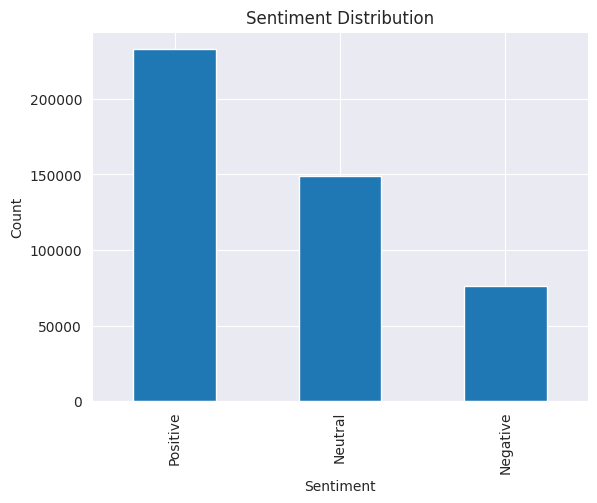

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts.plot(kind='bar', xlabel='Sentiment', ylabel='Count', title='Sentiment Distribution')
plt.show()